In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append(r'C:\Users\penny\OneDrive - Oregon State University\Postdoc\MeltInclusion_SampleStuff\Peak_Fitting_Tests')
import Peak_fits as pf
from os import listdir
from os.path import isfile, join

## Choose file and path here

In [13]:
path=r'C:\Users\penny\OneDrive - Oregon State University\Postdoc\MeltInclusion_SampleStuff\Raman\Day17\Spectra'
filetype='Witec_ASCII'


## Extract all files with ID_str in their name:
- If you've used a different identifier to Ne, enter it here!

In [14]:
ID_str='Ne'
file_fmt='txt'
exclude='png'
Allfiles = [f for f in listdir(path) if isfile(join(path, f))]
Ne_files=[item for item in Allfiles if ID_str in item and file_fmt in item and exclude not in item]
prefix=True
#Ne_files

## Select the file you want, go back up to this step per file

In [15]:
filename=Ne_files[1]
print(filename)

04 Ne_Lines_2.txt


## Plot the data, and find approximate peak positions
- This checks your file is actually a Ne line, not mislabelled
- And finds positions of peaks nearest the Ne lines you want. 
- If it doesnt find the peaks, adjust the height, threshold, distance parameters etc from Scipy

04 Ne_Lines_2.txt
          pos  height
1  1117.51087  1857.0
1117.51087
1447.878781


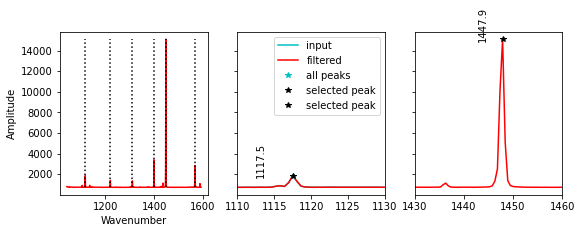

In [16]:
# Exclude range if have, say, some horrid spikes
exclude_range_1=None#[1000, 1113]
exclude_range_2=None#[1130, 1150]

# For weak Ne lines, use height and prominence=10, for strong, 100
Ne, df_sort_Ne_trim, nearest_1117, nearest_1447=pf.plot_Ne_lines(path=path, 
filename=filename, filetype=filetype,  n_peaks=6,
height=100, threshold=0.6, distance=1, prominence=100, width=1, 
exclude_range_1=exclude_range_1, exclude_range_2=exclude_range_2)

## Fit the peaks
- Most the time, this will just run using the peak positions from above
- if it isn't good enough fit, you can edit x_span for both peaks, which is the width of data it is using in the peak in wavenumber,
and the LH_offset_mini is how far to the left of the 1117 peak you want to place the second voigt. 

fitting a single peak, if you want the shoulder, do peaks_1117=2


,File_Name,1447_peak_cent,error_1447,1117_peak_cent,error_1117,deltaNe,Ne_Corr,Ne_Corr_min,Ne_Corr_max
0,Ne_Lines_2.txt,1447.73791,0.00463,1117.56042,0.0148,330.17749,1.000909,1.00085,1.000968


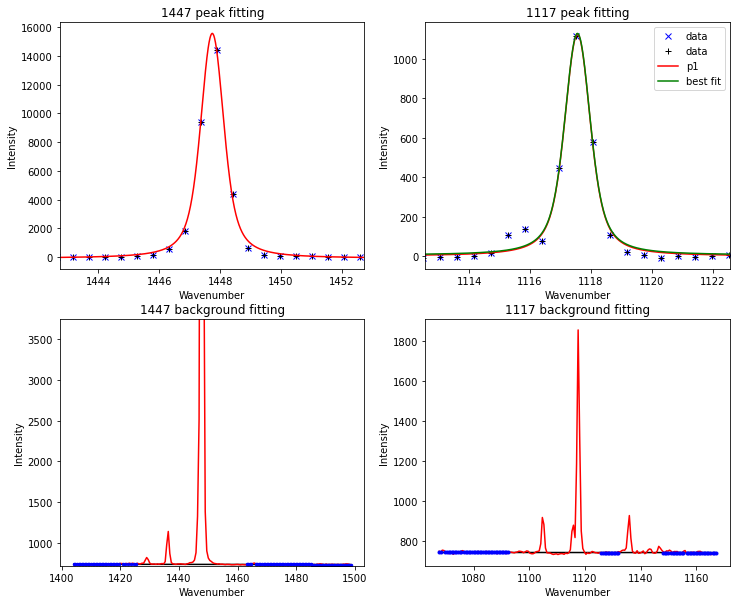

In [18]:

# How many degrees in polynomials
N_poly_1447_baseline=1
N_poly_1117_baseline=2
#If you have weak Ne lines and no secondary peak, set to 1
peaks_1117=1
# If weak, set to 10
amplitude=500

df, Ne_1117_reg_x_plot, Ne_1117_reg_y_plot=pf.fit_Ne_Line(Ne=Ne, 
filename=filename, path=path,
Ne_center_1=nearest_1117, Ne_center_2=nearest_1447,
peaks_1117=peaks_1117,
x_span_1447=20, x_span_1117_up=8, x_span_1117_low=10,
LH_offset_mini=[1.7, 4],  prefix=prefix, amplitude=amplitude)
df